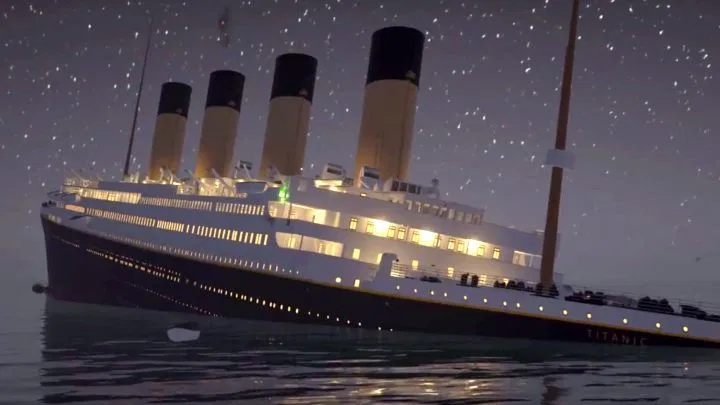

# <font color=blue>Domain Knowledge</font>


Titanic was a British passenger liner operated by the White Star Line. Titanic was on its way from Southampton to New York City when it sank in the North Atlantic Ocean in the early morning hours of 15 April 1912 after Titanic collided with an iceberg. The ship carried 2224 people, considering passengers and crew aboard,1514 of them died.

Titanic carried 16 wooden lifeboats and four collapsibles, which could accommodate 1,178 people, only one-third of Titanic's total capacity (and 53% of real number of passengers). At the time, lifeboats were intended to ferry survivors from a sinking ship to a rescuing ship—not keep afloat the whole population or power them to shore. If the SS Californian would responded to Titanic's distress calls, the lifeboats may have been adequate to ferry the passengers to safety as planned, but it didn't happen and the only way to survive were to get on the lifeboat.

The main question of the competition is “what sorts of people were more likely to survive?”

# <font color=blue>Problem Statement</font>

We are given the train and test data. The training set is used to build our machine learning models. For the training set, we are provided the outcome  for each passenger. Our model will be based on “features” like passengers’ gender and class. 

The test set is used to see how well our model performs on unseen data. For the test set, we are not provided the ground truth for each passenger. It is our job to predict these outcomes. For each passenger in the test set, use the model we trained to predict whether or not they survived the sinking of the Titanic.

In [1]:
# Importing neccesary libraries.

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
sns.set(style="darkgrid")

# <font color=blue>1. Reading and Inspection</font>

In [2]:
#Reading train and test files from the Titanic Data Set
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Determining the number of rows and columns in train and test dataframe
print('Train data: ', train_data.shape)
print('Test data: ', test_data.shape)

Train data:  (891, 12)
Test data:  (418, 11)


> ### <font color=green>The training-set has 891 passengers and 11 features + the target variable (survived). Whereas, the test-set has 418 passengers</font>

In [5]:
#Lets combine both the test and train data
titanic=pd.concat([train_data, test_data], sort=False).reset_index(drop=True)
titanic.shape

(1309, 12)

### <font color=green>There were total 1309 passengers onboard</font>

In [6]:
# let's look at the statistical aspects of the dataframes
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### <font color=green>We can see that 38% out of the training-set survived the Titanic.</font>

In [8]:
# Let's see the type of each column
print('Train Data')
print('-'*50)
train_data.info()
print('-'*50)
print('*'*75)
print('Test Data')
print('-'*50)
test_data.info()


Train Data
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
***************************************************************************
Test Data
---------------------------------------------

### <font color=green>Numeric variables : PassengerId,Age,Fare,SibSp,Parch</font>
### <font color=green>Categorical variables : Pclass,Name,Sex,Embarked</font>

In [9]:
#Checking missing values in train data

print('Missing values in Train Data')
print('-'*50)
print(train_data.isnull().sum())
print('-'*50)
print('*'*75)
print('Missing Percentage in Train Data ')
print('-'*50)
print(round(100*(train_data.isnull().sum()/len(train_data.index)),2))


Missing values in Train Data
--------------------------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
***************************************************************************
Missing Percentage in Train Data 
--------------------------------------------------
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


### <font color=green>Age,Cabin, Embarked features has missing  in the train data</font>

In [10]:
#Checking missing values in test data

print('Missing values in Test Data')
print('-'*50)
print(test_data.isnull().sum())
print('-'*50)
print('*'*75)
print('Missing Percentage in Test Data ')
print('-'*50)
print(round(100*(test_data.isnull().sum()/len(test_data.index)),2))


Missing values in Test Data
--------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------------------------------------------------
***************************************************************************
Missing Percentage in Test Data 
--------------------------------------------------
PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64


### <font color=green>Age, Cabin,Fare features has missing  in test data</font>

# <font color=blue>2. Data Visualisation</font>

### <font color=blue>Visualise the data on the training data</font>

### <font color=Darkblue>1. Survival: </font>

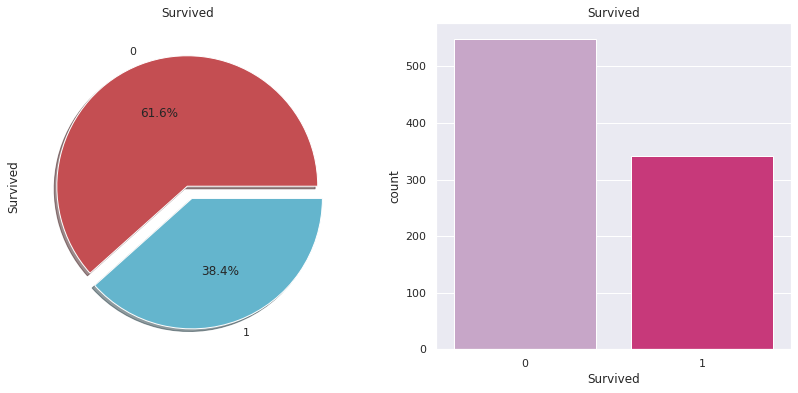

In [11]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
cols = ['r','c']



train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Survived')
plt.subplot(1,2,2)
sns.countplot('Survived',data=train_data,palette='PuRd')
plt.title('Survived')
plt.show()


* > ### <font color=green>These plots shows that not many passengers survived the accident. Out of 891 passengers in training set, only around 350 (38.4% ) people survived of the total training set. </font>

### <font color=Darkblue>2. Gender: </font>

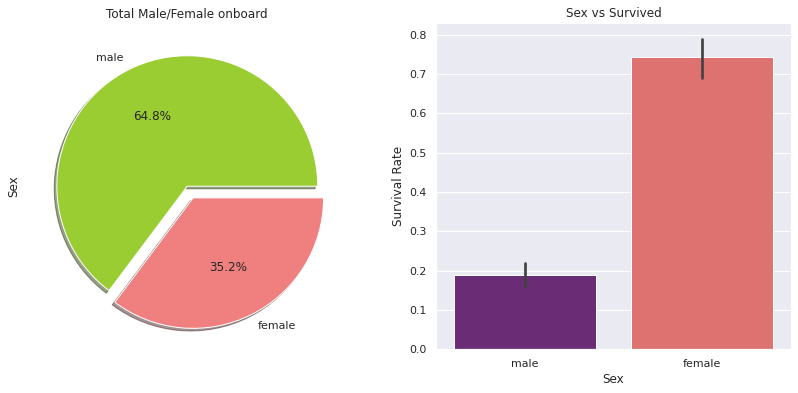

In [12]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
cols = ['yellowgreen', 'lightcoral']
train_data['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Total Male/Female onboard')
plt.subplot(1,2,2)
sns.barplot(x="Sex", y="Survived", data=train_data,palette='magma')
plt.title('Sex vs Survived')
plt.ylabel("Survival Rate")
plt.show()

> ### <font color=green>In the first plot we can see, The number of men onboard are more than that of women. In the second plot we can make out that the number of women survived are more</font>

* ### Gender appears to be a very good feature to use to predict survival, as shown by the large difference in propotion survived.

### <font color=Darkblue>2. Pclass: </font>

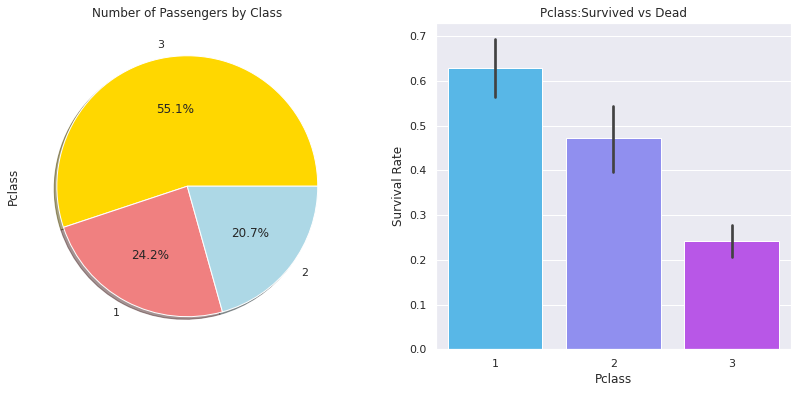

In [13]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
cols = ['gold', 'lightcoral', 'lightblue']
train_data['Pclass'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Number of Passengers by Class')
plt.subplot(1,2,2)
sns.barplot(x='Pclass', y='Survived',data=train_data, palette='cool')
plt.title('Pclass:Survived vs Dead')
plt.ylabel("Survival Rate")
plt.show()


* ### <font color=green> First plot shows, there were more passengers in Pclass 3, compared to Pclass 1 and 2</font>
* ### <font color=green>Passenegers of Pclass 1 had a very high chances to survive.</font>
* ### <font color=green>The number of survival from pclass 3 is low compare to Pclass 1 and 2.</font>


### <font color=Darkblue>Survival Rates Based on Gender and Class</font>

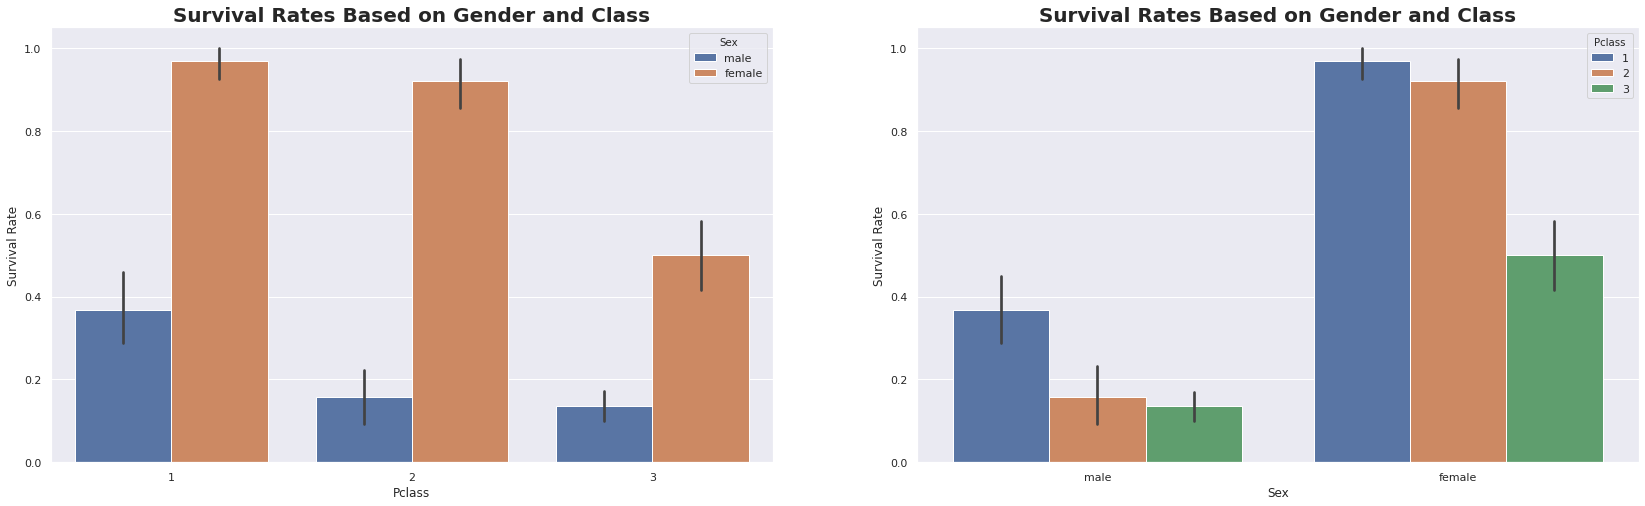

In [14]:
plt.figure(figsize=(14, 8))
plt.subplot(1,2,1)
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train_data)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class",fontweight="bold", size=20)

plt.subplot(1,2,2)
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train_data)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class",fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()


* ### <font color=green>We can see survival rates for females is more in all the three classes compared to men</font>
* ### <font color=green>People in Pclass 1 were more likely to survive than people in the other 2 Pclasses.</font>



### <font color=Darkblue>3. Age:   </font>

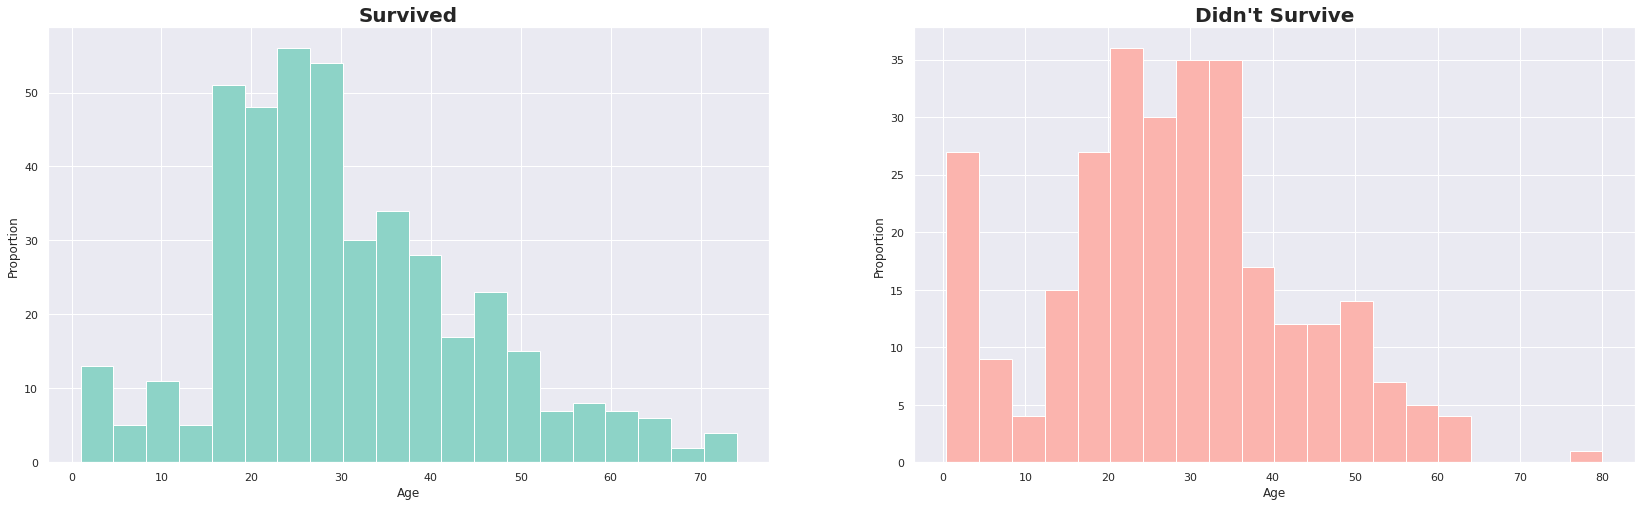

In [15]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
train_data[train_data['Survived']==0].Age.plot.hist(bins=20,cmap='Set3')
plt.title("Survived",fontweight="bold", size=20)
plt.ylabel("Proportion")
plt.xlabel("Age")


plt.subplot(1, 2, 2)
train_data[train_data['Survived']==1].Age.plot.hist(bins=20, cmap='Pastel1')
plt.title("Didn't Survive",fontweight="bold", size=20)
x2=list(range(0,85,5))
plt.subplots_adjust(right=1.7)
plt.ylabel("Proportion")
plt.xlabel("Age")


plt.show()

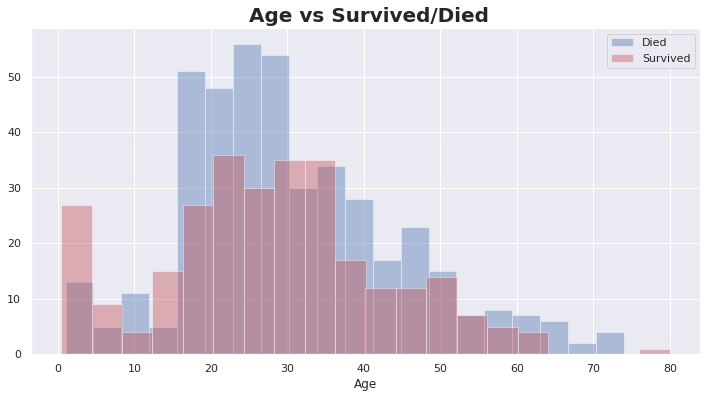

In [16]:
#lets see these two plots together
plt.figure(figsize=(12,6))
sns.distplot(train_data[train_data['Survived']==0].Age,bins=20, kde=False, color='b', label='Died')
sns.distplot(train_data[train_data['Survived']==1].Age,bins=20, kde=False, color='r',label='Survived')
plt.title(" Age vs Survived/Died",fontweight="bold", size=20)
plt.legend()
plt.show()

* > ### <font color=green>Children less than 5 years old were saved in large numbers</font>
* > ### <font color=green>More passengers died between age 15 to 30</font>
* > ### <font color=green>The oldest survived persen was 80.</font>

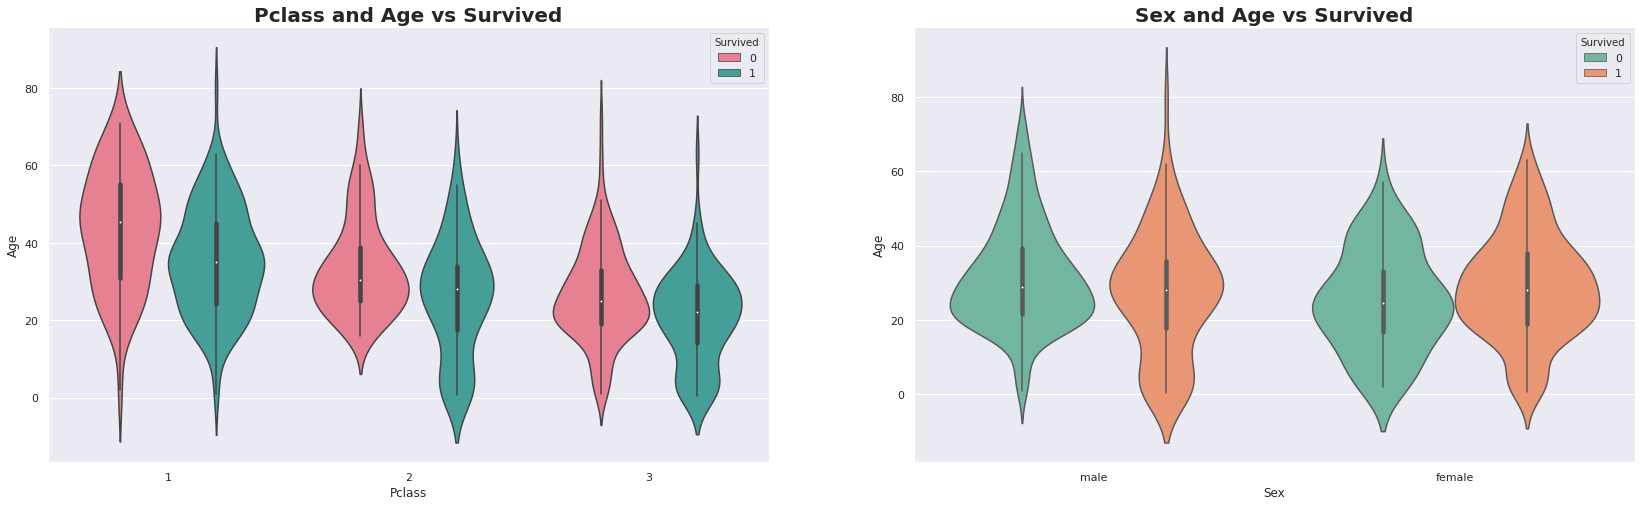

In [17]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.violinplot("Pclass","Age", hue="Survived", data=train_data,palette='husl')
plt.title("Pclass and Age vs Survived",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.violinplot("Sex","Age", hue="Survived", data=train_data,palette='Set2')
plt.title('Sex and Age vs Survived',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.show()



* > ### <font color=green>Females between age 20 to 50 had high chance to survive in class 1</font>
* > ### <font color=green>Third class young children and old aged people had less probability to survive </font>
* > ### <font color=green>Probability of Survival is almost same for male and females between age 20 to 40</font>
* > ### <font color=green>Females had greater chances to survive</font>

### <font color=Darkblue>5. Parch- Parents & Children:   </font>

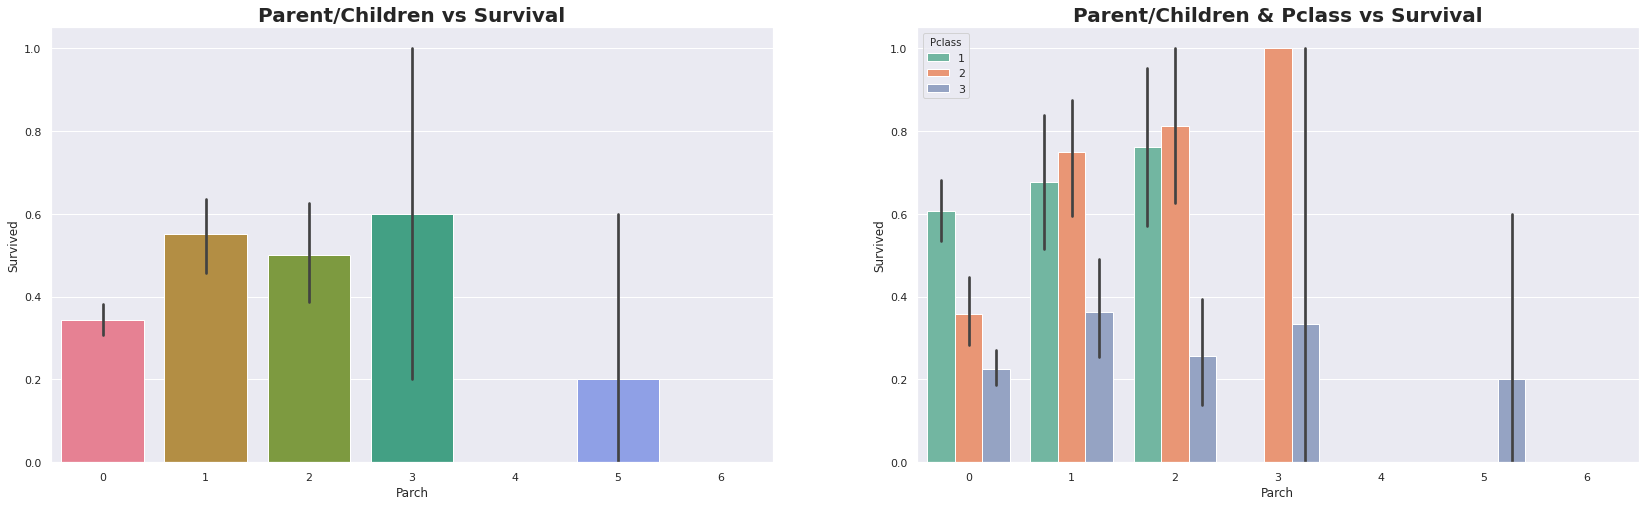

In [18]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='Parch',y="Survived", data=train_data,palette='husl')
plt.title("Parent/Children vs Survival",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.barplot(x='Parch',y="Survived",hue='Pclass' ,data=train_data,palette='Set2')
plt.title('Parent/Children & Pclass vs Survival',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()



* > ### <font color=green>Parents  with their children together who are one to three in number onboard have greater chance of survival. It however reduces as the number goes up</font>
* > ### <font color=green>We can see that Parents with children together who were 1- 2 in number were in class 1 and 2 and who were three in number were in class 2</font>
* > ### <font color=green>Class 3 has low survival rates for all the family members</font>   



### <font color=Darkblue>6.SibSp : Siblings/ Spouses   </font>

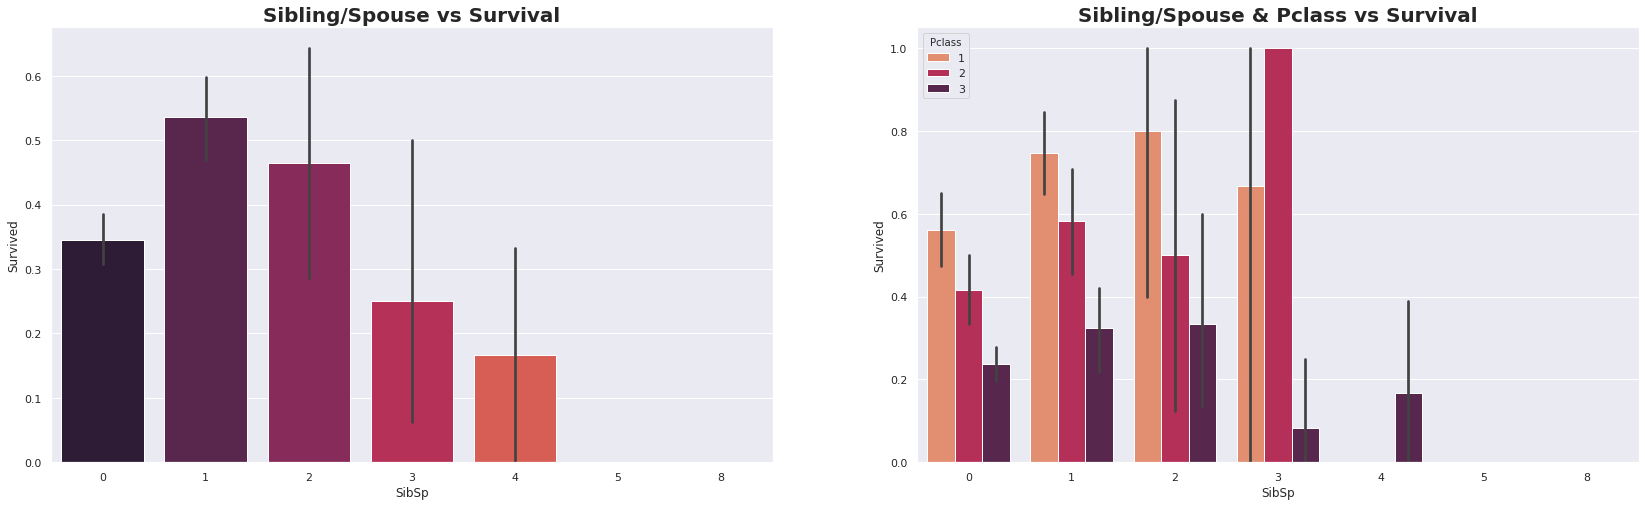

In [19]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='SibSp',y="Survived", data=train_data,palette='rocket')
plt.title("Sibling/Spouse vs Survival",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.barplot(x='SibSp',y="Survived",hue='Pclass' ,data=train_data,palette='rocket_r')
plt.title('Sibling/Spouse & Pclass vs Survival',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()



* > ### <font color=green>Higher chance to survive with 1 or 2 SibSp</font>
* > ### <font color=green>SibSp with 1,2 3 in number were in class 1 and 2</font>
* > ### <font color=green>Class 3 has low survival rate for Siblings and spouses together</font>   



### <font color=Darkblue>7. Embarked  </font>

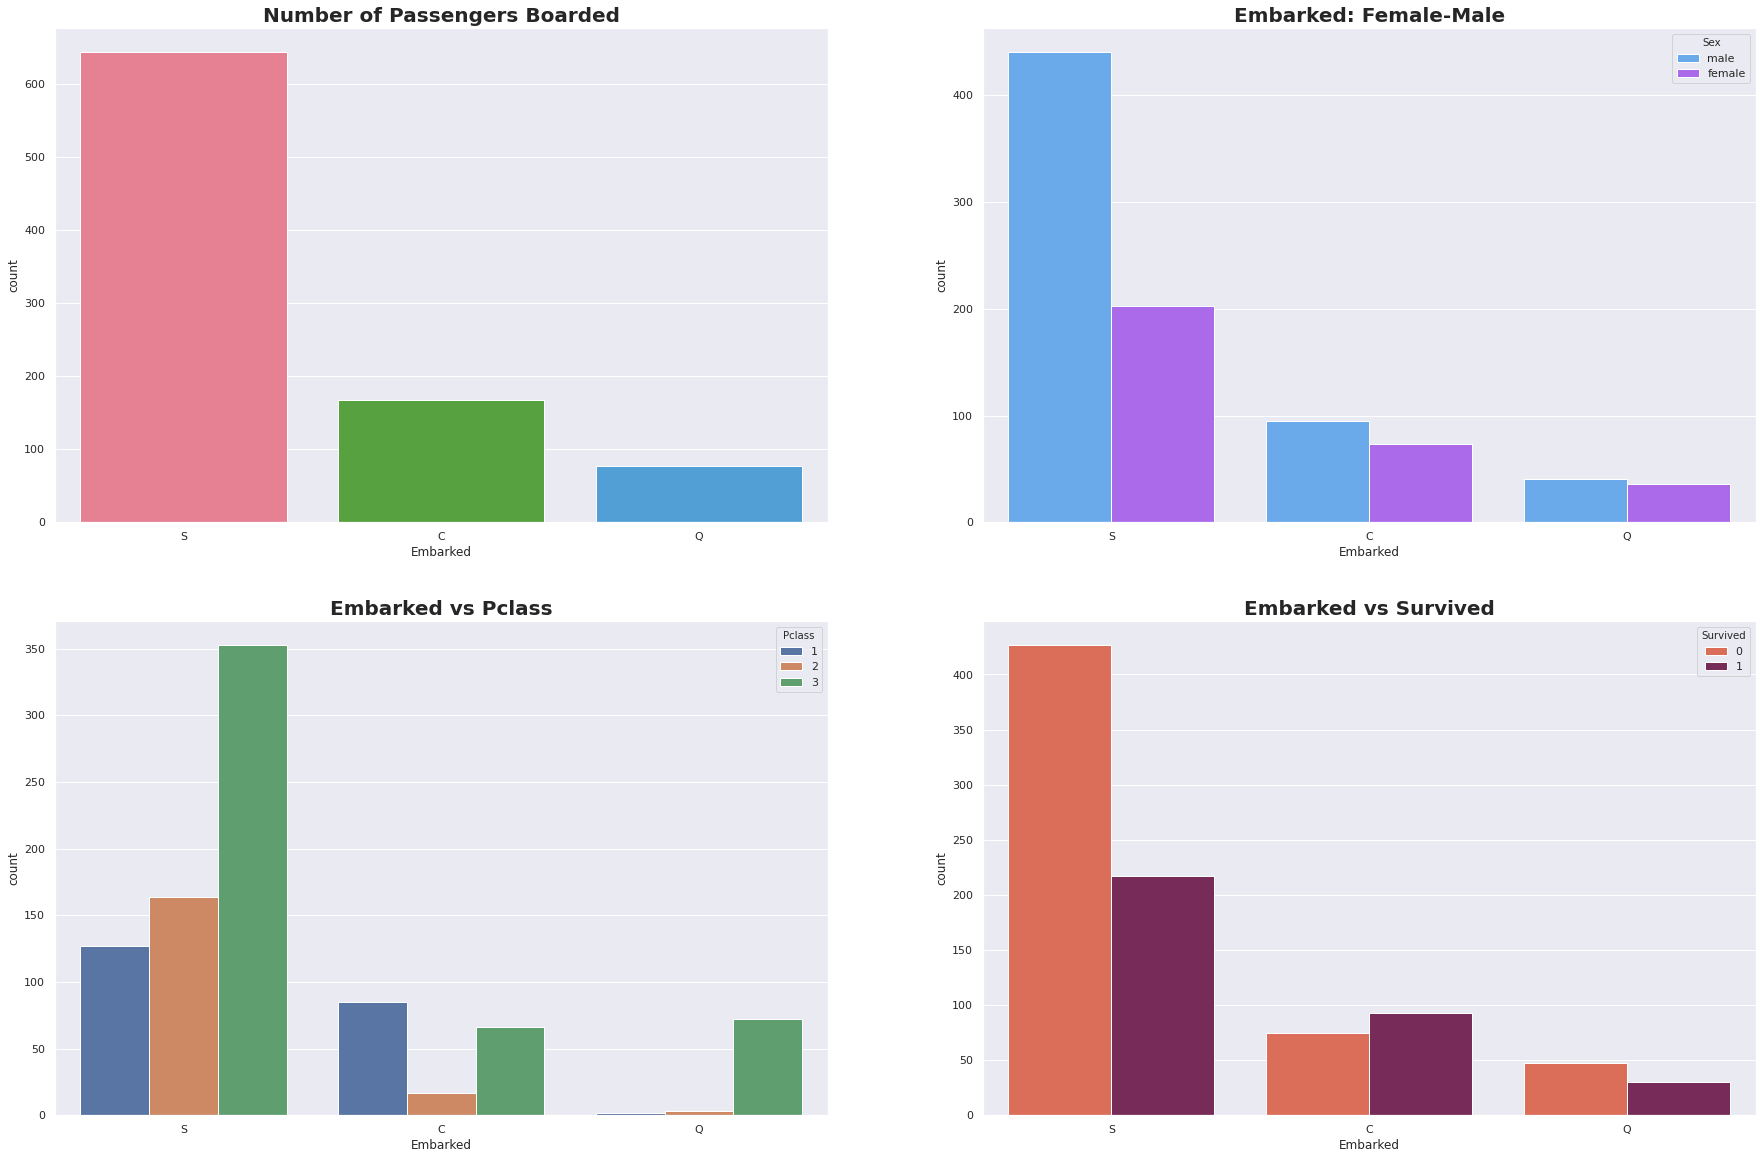

In [20]:
plt.figure(figsize=(15, 20))

plt.subplot(2, 2, 1)
sns.countplot('Embarked',data=train_data, palette='husl')
plt.title('Number of Passengers Boarded',fontweight="bold", size=20)
plt.subplot(2, 2, 2)
sns.countplot(x='Embarked',hue='Sex' ,data=train_data,palette='cool')
plt.title('Embarked: Female-Male',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.subplot(2, 2, 3)
sns.countplot(x='Embarked',hue='Pclass' ,data=train_data,palette='deep')
plt.title('Embarked vs Pclass',fontweight="bold", size=20)
plt.subplot(2, 2, 4)
sns.countplot(x='Embarked',hue='Survived' ,data=train_data,palette='rocket_r')
plt.title('Embarked vs Survived', fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.show()



* > ### <font color=green>Most of the passengers boarded form S and most of them were male</font>
* > ### <font color=green>Most of the Pclass 3 boarded form S, It could be reason S has lot of died person.</font>




### <font color=Darkblue>8. Fare  </font>

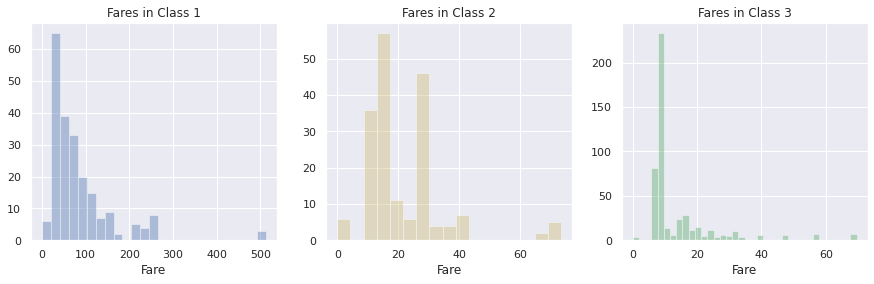

In [21]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)

sns.distplot(train_data[train_data['Pclass']==1].Fare, kde=False)
plt.title('Fares in Class 1')
plt.subplot(1,3,2)
sns.distplot(train_data[train_data['Pclass']==2].Fare, kde=False,color='y')
plt.title('Fares in Class 2')
plt.subplot(1,3,3)
sns.distplot(train_data[train_data['Pclass']==3].Fare, kde=False, color='g')
plt.title('Fares in Class 3')
plt.show()

* > ### <font color=green>There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces.

* > ## <font color=blue>Heatmap </font>

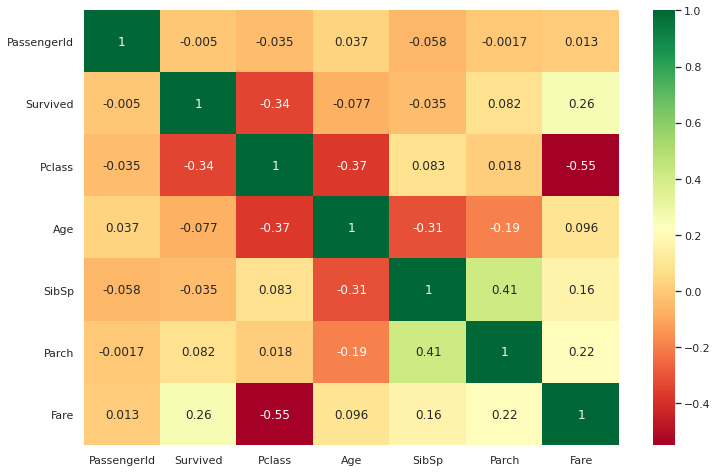

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

* >### <font color=green>We can see survival is in good relation with Fare variable</font>
* > ### <font color=green>Survival also has strong negative correlation with sex and p-class</font>


# <font color=blue>3. Exploring some Real Data</font>

### Lets explore some real data on the combined data "titanic'

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
fare=titanic.sort_values(by=['Fare'],ascending=False)
fare[0:10]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
944,945,NaN,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
960,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S


* > ### <font color=green>We can see the highest fare was 512.39. And were in ticket class 1.</font>
* > ### <font color=green>Highest Fare was for the people who boarded from Cherbourg</font>
* > ### <font color=green>People who gave high fare were alone and not accompanied by siblings/Spouses and were of middle age</font>


In [25]:
age=titanic.sort_values(by=['Age'],ascending=False)
age[0:5]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
987,988,NaN,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
851,852,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0.0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0.0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


* > ### <font color=green>Oldest passenger Survived was 80 year old boarded from Southampton who was in class 1</font>


In [26]:
sibsp=titanic.sort_values(by=['SibSp'],ascending=False)
sibsp[0:10]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
1079,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
1251,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
1031,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.90,NaN,S


* > ### <font color=green>Highest number of Siblings/Spouses were 8 in number, boarded from Southampton</font>
* > ### <font color=green>None of them seems to be survived as they were in class 3.As we saw in visualisation class 3 has very less survivors</font>
* > ### <font color=green>We can also see all 8 people were from same Sage Family</font>


In [27]:
parch=titanic.sort_values(by=['Parch'],ascending=False)
parch[0:10]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1233,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN,S
1256,1257,NaN,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.5500,NaN,S
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
1030,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9000,NaN,S
610,611,0.0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
1065,1066,NaN,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,NaN,S
885,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
25,26,1.0,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
638,639,0.0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S


* > ### <font color=green>High parent children count were 9 in number</font>
* > ### <font color=green>We can also see class Passengers having Family(SibSp, Parch were in class 3</font>


# <font color=blue>2. Data Preparation</font>

* > ## <font color=blue>Handling missing values</font>

* <font color=red>Cabin: Cabin has a lot of missing values. We can drop it</font>

In [28]:
train_data.drop("Cabin", axis = 1, inplace = True)
test_data.drop("Cabin", axis = 1, inplace = True)

*  <font color=red>Age: We can fill in the null values with the median for the most accuracy.</font>

In [29]:
#the median will be an acceptable value to place in the NaN cells
train_data["Age"].fillna(train_data["Age"].median(), inplace = True)
test_data["Age"].fillna(test_data["Age"].median(), inplace = True) 

*  <font color=red>Embarked: Embarked is a categorical variable, So here we can impute the missing values with the most popular category</font>

In [30]:
train_data['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [31]:
Embarked_mode=train_data['Embarked'].mode()[0]
Embarked_mode

'S'

In [32]:
#impute with mode
train_data["Embarked"].fillna("S", inplace = True)

*   <font color=red>Fare: Fare in test data is a numerical variable, lets impute with median</font>

In [33]:
test_data["Fare"].fillna(test_data["Fare"].median(), inplace = True)


### <font color=green>Now lets check the missing values again</font>

In [34]:
#Checking missing values in train data

print('Missing values in Train Data')
print('-'*50)
print(train_data.isnull().sum())
print('-'*50)
print('*'*75)
print('Missing values in Test Data ')
print('-'*50)
print(test_data.isnull().sum())


Missing values in Train Data
--------------------------------------------------
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
--------------------------------------------------
***************************************************************************
Missing values in Test Data 
--------------------------------------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### <font color=green>No more missing values in our dataset</font>

###  <font color=blue>Lets convert our categorical data to numeric</font>

In [35]:
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})
test_data['Sex']= test_data['Sex'].map({'female': 0, 'male': 1})

train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1,'Q': 2})
test_data['Embarked']= test_data['Embarked'].map({'S': 0, 'C': 1,'Q': 2})

In [36]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


### We can drop Name and Ticket column 

In [37]:
train_data.drop(["Name","Ticket"], axis = 1, inplace = True)
test_data.drop(["Name","Ticket"], axis = 1, inplace = True)

### We can combine SibSp and Parch into one Family, which indicates the total number of family members on board for each member.

In [38]:
train_data["Family"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["Family"] = test_data["SibSp"] + test_data["Parch"] + 1

In [39]:
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,1,22.0,1,0,7.2500,0,2
1,2,1,1,0,38.0,1,0,71.2833,1,2
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,2
4,5,0,3,1,35.0,0,0,8.0500,0,1


# <font color=blue>4. Feature Scaling</font>

In [40]:
scaler = StandardScaler()

train_data[['Age','Fare']] = scaler.fit_transform(train_data[['Age','Fare']])
test_data[['Age','Fare']] = scaler.transform(test_data[['Age','Fare']])

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,1,-0.565736,1,0,-0.502445,0,2
1,2,1,1,0,0.663861,1,0,0.786845,1,2
2,3,1,3,0,-0.258337,0,0,-0.488854,0,1
3,4,1,1,0,0.433312,1,0,0.420730,0,2
4,5,0,3,1,0.433312,0,0,-0.486337,0,1


In [41]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,892,3,1,0.394887,0,0,-0.490783,2,1
1,893,3,0,1.355510,1,0,-0.507479,0,2
2,894,2,1,2.508257,0,0,-0.453367,2,1
3,895,3,1,-0.181487,0,0,-0.474005,0,1
4,896,3,0,-0.565736,1,1,-0.401017,0,3


# <font color=blue>4. Model Building</font>

### <font color=blue>Logistic Regression</font>

In [42]:
X_train = train_data.drop(['Survived','PassengerId'], axis=1)
y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1)
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [43]:
print(X_train.columns)
print(X_test.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family'], dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family'], dtype='object')


In [44]:
 Features=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family']

In [45]:
# Logistic Regression

LR = LogisticRegression()
LR.fit(X_train, y_train)

# Making Predictions
y_pred = LR.predict(X_test)


In [46]:
# Calculating the Accuracy of the model.

print("Accuracy:",round(LR.score(X_train, y_train)*100,2))

Accuracy: 80.13


In [47]:
coefs=LR.coef_[0]
coefs

array([-1.08457354, -2.60851445, -0.49786171, -0.18694189,  0.05568359,
        0.1185496 ,  0.24171383, -0.1312801 ])

### <font color=blue>Random Forest</font>

In [48]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)


In [49]:
#Checking accuracy
random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

97.87

In [50]:
feature_importance = pd.Series(random_forest.feature_importances_,index=Features).sort_values(ascending=False)
feature_importance

Fare        0.263405
Sex         0.260406
Age         0.257291
Pclass      0.076628
Family      0.053324
Embarked    0.033098
SibSp       0.029480
Parch       0.026368
dtype: float64

### <font color=green>We can see Random Forest is providing the high accuracy of 98%</font>
### <font color=green>The features along with coefficients are listed above</font>

# <font color=blue>5. Output</font>

In [51]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_pred})

output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
